# 1. TRIMODAL SETUP

## Setup the environment

#### Adding the source code path

In [5]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [6]:
import random

random.seed(10)

#### Import experiment data 

In [7]:
from DATA import NARMA10

data = NARMA10(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [8]:
N_UNITS = 250

In [9]:
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, desired_rho=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

In [58]:
simple_reservoir.LCE(X_TS)

-1.4038377

In [59]:
simple_reservoir.de_fi()

0.24279765108037907


## TRIMODAL APPROACH

In [13]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 
from IPReservoir import IPReservoir

half_trimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.trimodal(N_UNITS, 0.5), bias = False)

half_trimodal_reservoir.W_x = W_x
half_trimodal_reservoir.W_u = W_u
# half_trimodal_reservoir.b_x = b_x
# half_trimodal_reservoir.b_u = b_u

In [60]:
half_trimodal_reservoir.mask.areAllGaussian

True

In [21]:
half_trimodal_reservoir.pre_train(X_TR, eta= 0.00000015, epochs=50,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 570.6897583007812.
- Epoch: 2) | KL Divergence value: 583.0301513671875.
- Epoch: 3) | KL Divergence value: 596.5572509765625.
- Epoch: 4) | KL Divergence value: 611.2200927734375.
- Epoch: 5) | KL Divergence value: 626.9705810546875.


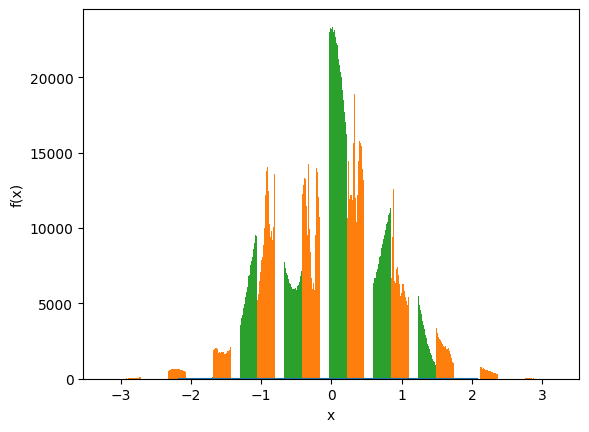

In [22]:
half_trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
half_trimodal_reservoir.plot_global_neural_activity()

In [23]:

half_trimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.8183644413948059)  ACTUAL_STD == (0.09563533961772919)][ TARGET_MEAN == (0.0015627758111804724) TARGET_STD == (0.25421804189682007)]
Unit - (2): [ ACTUAL_MEAN == (0.5192915797233582)  ACTUAL_STD == (0.03332604467868805)][ TARGET_MEAN == (8.600053115515038e-05) TARGET_STD == (0.2543843388557434)]
Overall network: [ACTUAL_MEAN == (0.003396520158275962)  ACTUAL_STD == (0.8622143864631653)]


## CHAOTIC TRIMODAL

In [24]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 
from IPReservoir import IPReservoir

chaotic_trimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.trimodal(N_UNITS, 0.66), bias = False)

chaotic_trimodal_reservoir.W_x = W_x
chaotic_trimodal_reservoir.W_u = W_u
#trimodal_reservoir.b_x = b_x
#trimodal_reservoir.b_u = b_u



In [25]:
chaotic_trimodal_reservoir.mask.areAllGaussian

True

In [31]:
chaotic_trimodal_reservoir.pre_train(X_TR, eta= 0.00000015, epochs=50,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 554.6798706054688.
- Epoch: 2) | KL Divergence value: 562.9945068359375.
- Epoch: 3) | KL Divergence value: 572.5394897460938.
- Epoch: 4) | KL Divergence value: 583.2962646484375.
- Epoch: 5) | KL Divergence value: 595.2450561523438.
- Epoch: 6) | KL Divergence value: 608.3631591796875.
- Epoch: 7) | KL Divergence value: 622.6275024414062.
- Epoch: 8) | KL Divergence value: 638.0133056640625.
- Epoch: 9) | KL Divergence value: 654.4933471679688.
- Epoch: 10) | KL Divergence value: 672.0394897460938.
- Epoch: 11) | KL Divergence value: 690.6192626953125.
- Epoch: 12) | KL Divergence value: 710.19482421875.
- Epoch: 13) | KL Divergence value: 730.728759765625.
- Epoch: 14) | KL Divergence value: 752.17529296875.
- Epoch: 15) | KL Divergence value: 774.490234375.


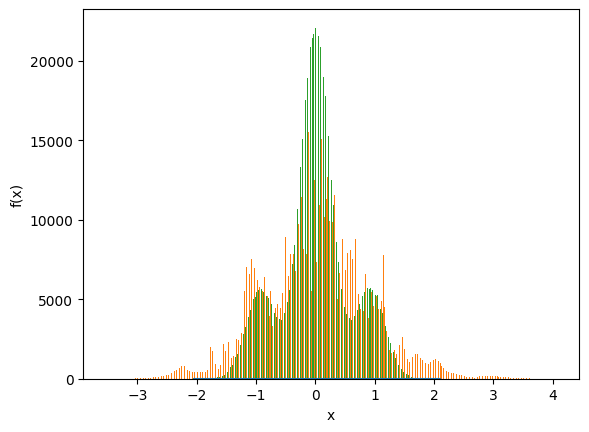

In [32]:
chaotic_trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
chaotic_trimodal_reservoir.plot_global_neural_activity()

In [33]:

chaotic_trimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-1.1231130361557007)  ACTUAL_STD == (0.10671038180589676)][ TARGET_MEAN == (-0.002488083206117153) TARGET_STD == (0.2506682276725769)]
Unit - (2): [ ACTUAL_MEAN == (0.568290114402771)  ACTUAL_STD == (0.03916634991765022)][ TARGET_MEAN == (0.0008902468835003674) TARGET_STD == (0.2521108388900757)]
Overall network: [ACTUAL_MEAN == (0.011407006531953812)  ACTUAL_STD == (0.8902539610862732)]


## EQUALLY TRIMODAL

In [34]:
from ESN import EchoStateNetwork

equally_trimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.trimodal(N_UNITS, 0.33), bias = False)

equally_trimodal_reservoir.W_x = W_x
equally_trimodal_reservoir.W_u = W_u

In [45]:
equally_trimodal_reservoir.pre_train(X_TR, eta= 0.00000005, epochs=50,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 623.1588134765625.
- Epoch: 2) | KL Divergence value: 614.9595947265625.
- Epoch: 3) | KL Divergence value: 606.9893798828125.
- Epoch: 4) | KL Divergence value: 599.248291015625.
- Epoch: 5) | KL Divergence value: 591.7346801757812.
- Epoch: 6) | KL Divergence value: 584.4459228515625.
- Epoch: 7) | KL Divergence value: 577.38232421875.
- Epoch: 8) | KL Divergence value: 570.5452880859375.
- Epoch: 9) | KL Divergence value: 563.9351806640625.
- Epoch: 10) | KL Divergence value: 557.5507202148438.
- Epoch: 11) | KL Divergence value: 551.3900146484375.
- Epoch: 12) | KL Divergence value: 545.4515380859375.
- Epoch: 13) | KL Divergence value: 539.73291015625.
- Epoch: 14) | KL Divergence value: 534.23193359375.
- Epoch: 15) | KL Divergence value: 528.9465942382812.
- Epoch: 16) | KL Divergence value: 523.8751220703125.
- Epoch: 17) | KL Divergence value: 519.016357421875.
- Epoch: 18) | KL Divergence

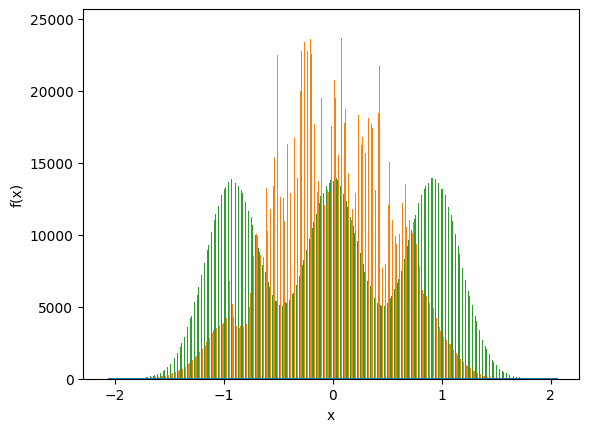

In [46]:
equally_trimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
equally_trimodal_reservoir.plot_global_neural_activity()

In [47]:
equally_trimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.4609290063381195)  ACTUAL_STD == (0.08460452407598495)][ TARGET_MEAN == (-0.005969335790723562) TARGET_STD == (0.25092893838882446)]
Unit - (2): [ ACTUAL_MEAN == (0.1604842096567154)  ACTUAL_STD == (0.02556833252310753)][ TARGET_MEAN == (0.0019109336426481605) TARGET_STD == (0.24749545753002167)]
Overall network: [ACTUAL_MEAN == (-0.011407056823372841)  ACTUAL_STD == (0.5308426022529602)]


### COMPARISON ON TEST DATA

In [48]:
from Metrics import NRMSE, MSE
from ESN import EchoStateNetwork

half_trimodal_esn = EchoStateNetwork(half_trimodal_reservoir)
equally_trimodal_esn = EchoStateNetwork(equally_trimodal_reservoir)


half_trimodal_esn.reservoir.reset_initial_state()
equally_trimodal_esn.reservoir.reset_initial_state()


half_trimodal_esn.reservoir.warm_up(X_TR[0:100])
equally_trimodal_esn.reservoir.warm_up(X_TR[0:100])


half_trimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)
equally_trimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)

Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.2578125 , 0.2265625 , 0.20703125, ..., 0.30078125, 0.2421875 ,
       0.20703125], dtype=float32)

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.023764060020379053


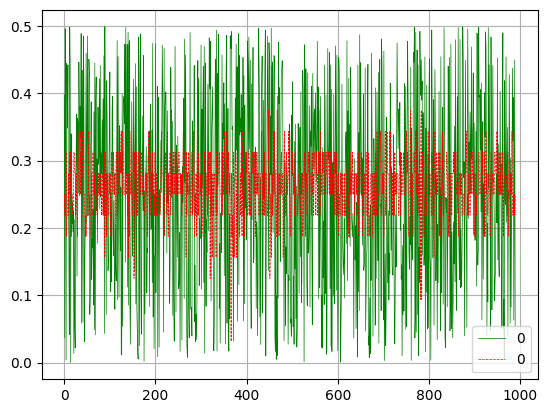

In [49]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { half_trimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022742030018445655


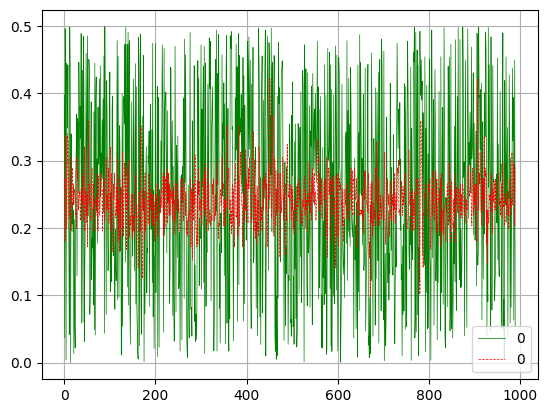

In [50]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { equally_trimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [51]:
half_trimodal_esn.MemoryCapacity()

tensor(12.4480)

In [52]:
equally_trimodal_esn.MemoryCapacity()

tensor(11.9223)

Reservoir warmed up with the first 100 time steps
NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022209668045631577
tensor(12.4491)


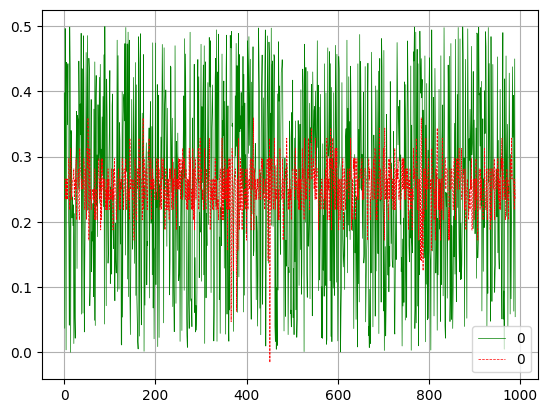

In [53]:
chaotic_trimodal_esn = EchoStateNetwork(chaotic_trimodal_reservoir)
chaotic_trimodal_esn.reservoir.reset_initial_state()
chaotic_trimodal_esn.reservoir.warm_up(X_TR[0:100])
chaotic_trimodal_esn.train(X_TR[100:None], Y_TR[100:None], 0)
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { chaotic_trimodal_esn.evaluate(X_TS[10:None], Y_TS[10:None], metric=MSE(), plot=True)}" )
print(chaotic_trimodal_esn.MemoryCapacity())



## Lyapunov Exponent and Deviarion from linearity

In [54]:
print(half_trimodal_reservoir.de_fi())
print(half_trimodal_reservoir.LCE(X_TS))

0.23877038375708762
None
-1.6883625


In [55]:
print(chaotic_trimodal_reservoir.de_fi())
print(chaotic_trimodal_reservoir.LCE(X_TS))

0.26148989782509957
None
-2.130752


In [56]:
print(equally_trimodal_reservoir.de_fi())
print(equally_trimodal_reservoir.LCE(X_TS))

0.23145931974150213
None
-1.4681059
